In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import fix_seed
from models import VariationalAutoEncoder
from datasets import load_tfds

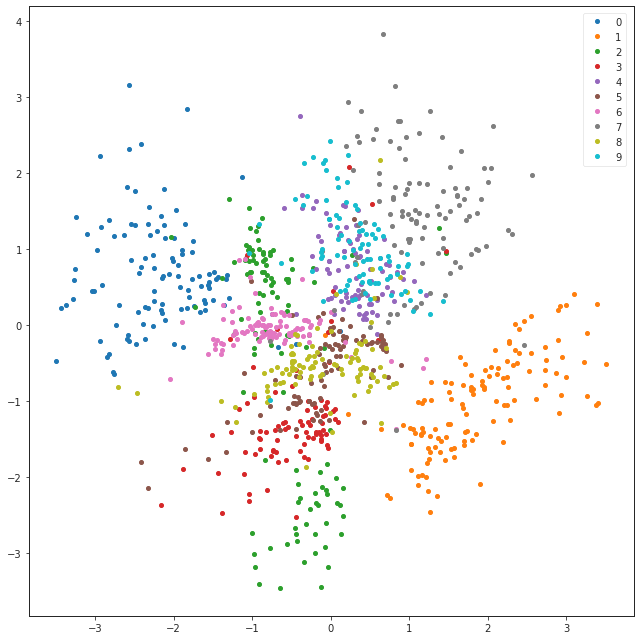

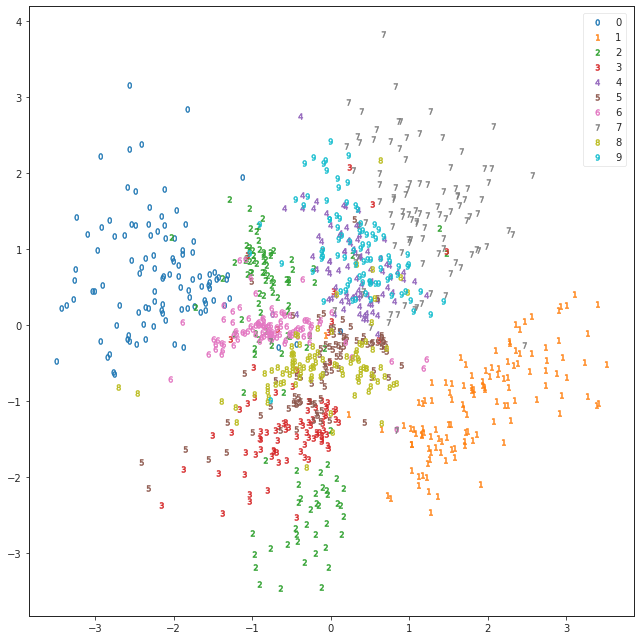

2022-02-18 23:54:38.878217: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [22]:
log_dir = "./logs"
seed = 42
fix_seed(seed)
x_dim = 28 * 28
z_dim = 2
batch_size = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

_, _, dataset_test = load_tfds("mnist", batch_size=batch_size, seed=seed, preprocess_fn=None)

model = VariationalAutoEncoder(x_dim, z_dim, device)
model.load_state_dict(torch.load("./models/checkpoint_z2.pth"))
model.eval()

cm = plt.get_cmap("tab10")
sns.set_style('ticks')

for num_batch, data in enumerate(dataset_test):
    image = np.array(data['image'] / 255)
    label = np.array(data['label'])
    image = torch.from_numpy(np.array(image))
    fig_plot, ax_plot = plt.subplots(figsize=(9, 9))
    fig_scatter, ax_scatter = plt.subplots(figsize=(9, 9))

    _, z, _ = model(image)
    z = z.detach().numpy()

    for k in range(10):
        cluster_indexes = np.where(label == k)[0]
        ax_plot.plot(z[cluster_indexes, 0], z[cluster_indexes, 1], "o", ms=4, color=cm(k), label=f"{k}")
        ax_scatter.scatter(z[cluster_indexes, 0], z[cluster_indexes, 1], marker=f"${k}$", color=cm(k), label=f"{k}")
    ax_plot.spines['right'].set_visible(True)
    fig_plot.legend(loc=(0.91, 0.74))
    fig_scatter.legend(loc=(0.91, 0.74))
    fig_plot.tight_layout()
    fig_scatter.tight_layout()
    fig_plot.savefig(f"./figure/latent_space_z_{z_dim}_{num_batch}_plot.png")
    fig_scatter.savefig(f"./figure/latent_space_z_{z_dim}_{num_batch}_scatter.png")
    plt.show(fig_plot)
    plt.show(fig_scatter)
    break